In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from collections import Counter

import venn as venn
%matplotlib inline

In [2]:
exs = pd.read_excel('uniprot-filtered-organism__Homo+sapiens+(Human)+(9606)_+AND+review--.xlsx')
exs.index = exs['Entry']
exs = exs.drop(['Entry', 'Entry name', 'Protein names', 'Gene names', 'Status', 'Gene ontology (biological process)', 'Gene ontology (cellular component)', 'Gene ontology (molecular function)'], axis=1)
exs

,Sequence,Gene ontology (GO),Gene ontology IDs
Entry,,,
Q8N7X0,MASKQTKKKEVHRINSAHGSDKSKDFYPFGSNVQSGSTEQKKGKFP...,calcium-dependent cysteine-type endopeptidase ...,GO:0004198; GO:0019825; GO:0020037
Q5T1N1,MDEADFSEHTTYKQEDLPYDGDLSQIKIGNDYSFTSKKDGLEVLNQ...,"DNA-binding transcription activator activity, ...",GO:0000978; GO:0001228; GO:0001837
Q92667,MAIQFRSLFPLALPGMLALLGWWWFFSRKKGHVSSHDEQQVEAGAV...,cytosol [GO:0005829]; integral component of me...,GO:0003723; GO:0005739; GO:0005741; GO:0005829...
Q5VUY0,MWDLALIFLAAACVFSLGVTLWVICSHFFTVHIPAAVGHPVKLRVL...,integral component of membrane [GO:0016021]; c...,GO:0016021; GO:0016787; GO:0052689
P62736,MCEEEDSTALVCDNGSGLCKAGFAGDDAPRAVFPSIVGRPRHQGVM...,actin cytoskeleton [GO:0015629]; cell body [GO...,GO:0005524; GO:0005615; GO:0005737; GO:0005829...
...,...,...,...
Q8N895,MQKEMKMIKDEDVHFDLAVKKTPSFPHCLQPVASRGKAPQRHPFPE...,nucleus [GO:0005634]; DNA binding [GO:0003677]...,GO:0000122; GO:0003677; GO:0003714; GO:0005634...
Q9UK55,MKVVPSLLLSVLLAQVWLVPGLAPSPQSPETPAPQNQTSRVVQAPK...,endoplasmic reticulum lumen [GO:0005788]; extr...,GO:0004867; GO:0005615; GO:0005788; GO:0007596...
Q96MX3,MERAVEPWGPDLHRPEEREPQRGARTGLGSENVISQPNEFEHTPQE...,nucleus [GO:0005634]; DNA binding [GO:0003677]...,GO:0003677; GO:0005634; GO:0042802; GO:0046872


In [3]:
gene_ontology = exs['Gene ontology (GO)'].tolist()
lst = [str(ontology).split(';') for ontology in gene_ontology]


In [4]:
flat_list = []
for sublist in lst:
    for item in sublist:
        flat_list.append(item)

In [5]:
flat_list = list(map(str.lstrip, flat_list))

In [6]:
flat_list1 =[]
for line in flat_list:
    line = line.split(' [')[0]
    flat_list1.append(line)

In [7]:
go_list = pd.Series(Counter(flat_list1))
go_df = go_list.to_frame()
go_df.columns = ['frequency']
go_df.index.name = 'gene ontology'
go_df['fraction of proteins'] = (go_df['frequency']/20385)*100
head = go_df.nlargest(20,'frequency')
head
go_df


,frequency,fraction of proteins
gene ontology,,
calcium-dependent cysteine-type endopeptidase activity,15,0.073584
heme binding,138,0.676968
oxygen binding,32,0.156978
"DNA-binding transcription activator activity, RNA polymerase II-specific",455,2.232033
RNA polymerase II cis-regulatory region sequence-specific DNA binding,636,3.119941
...,...,...
UDP-N-acetylgalactosamine diphosphorylase activity,1,0.004906
mitochondrion-derived vesicle,1,0.004906
"neurotransmitter receptor transport, endosome to plasma membrane",1,0.004906


In [8]:
go_df.to_csv('all_prot.csv')

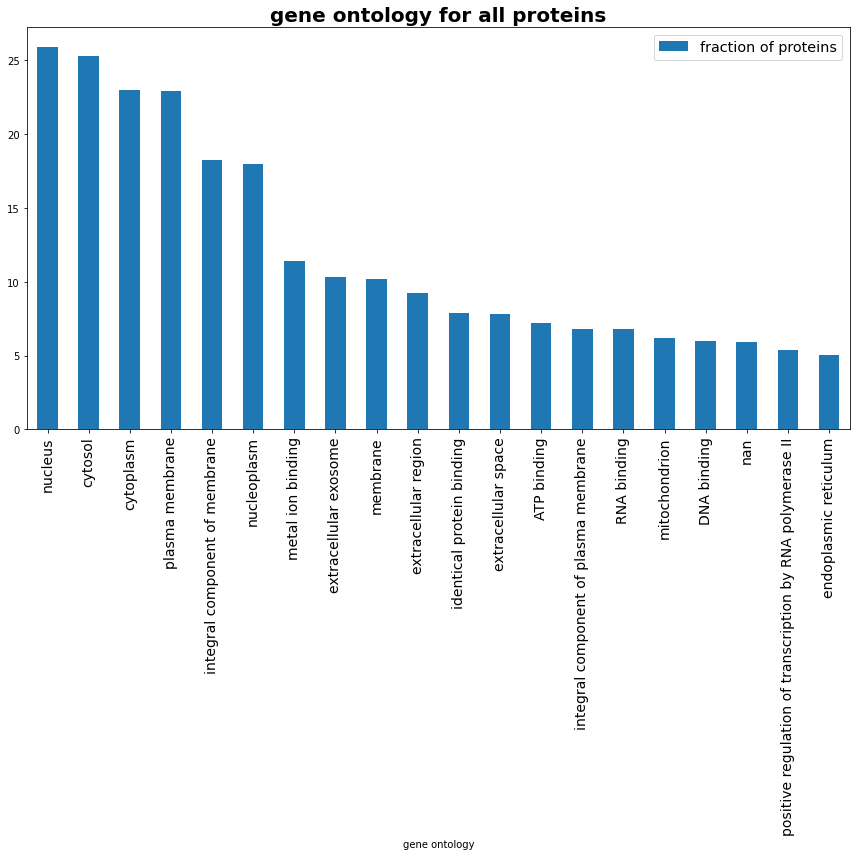

In [9]:
ax = head.plot(kind ='bar', y='fraction of proteins', rot= 90, figsize = (12,12))
plt.title('gene ontology for all proteins', fontsize=20, fontweight = 'bold')
plt.legend(fontsize=30) 
plt.legend(fontsize="x-large")
plt.xticks(fontsize=14)
plt.tight_layout()

plt.savefig('all proteins.png', bbox_inches='tight', pad_inches = 0.0)

In [10]:
data = pd.read_excel('uniprot-filtered-organism__Homo+sapiens+(Human)+(9606)_+AND+review--.xlsx')
data.index = data['Entry']
data = data.drop(['Entry', 'Entry name', 'Protein names', 'Gene names', 'Status', 'Gene ontology (biological process)', 'Gene ontology (cellular component)', 'Gene ontology (molecular function)'], axis=1)


In [11]:
data['Gene ontology IDs']= data['Gene ontology IDs'].str.split(pat=';', expand = False)
data['count'] = data['Gene ontology IDs'].str.len()
data = data.sort_values(by=['count'], ascending = False)
data

,Sequence,Gene ontology (GO),Gene ontology IDs,count
Entry,,,,
P05067,MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMN...,amyloid-beta complex [GO:0106003]; apical part...,"[GO:0000122, GO:0000185, GO:0000187, GO:000...",236.0
P35222,MATQADLMELDMAMEPDRKAAVSHWQQQSYLDSGIHSGATTTAPSL...,adherens junction [GO:0005912]; apical part of...,"[GO:0000122, GO:0000209, GO:0000578, GO:000...",207.0
P04637,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,centrosome [GO:0005813]; cytoplasm [GO:0005737...,"[GO:0000122, GO:0000733, GO:0000790, GO:000...",176.0
P31749,MSDVAIVKEGWLHKRGEYIKTWRPRYFLLKNDGTFIGYKERPQDVD...,cell-cell junction [GO:0005911]; ciliary basal...,"[GO:0001649, GO:0001893, GO:0001934, GO:000...",172.0
P46531,MPPLLAPLLCLALLPALAARGPRCSQPGETCLNGGKCEAANGTEAC...,acrosomal vesicle [GO:0001669]; adherens junct...,"[GO:0000122, GO:0000139, GO:0001669, GO:000...",169.0
...,...,...,...,...
Q96M66,MAAKSTQDSLPRDTGEPSALPVQGRAEGRSSEGRKERTAECALRGK...,NaN,NaN,NaN
Q8N1X5,MAAAGVTAKAGGGTSAAAASLIRARSPAWPRRAVSCSLARGTGAPK...,NaN,NaN,NaN
A6NMA1,MDSVLIHVLIDGLVACVAQLIRIADELLQFILQVQEVPYVEENGRA...,NaN,NaN,NaN


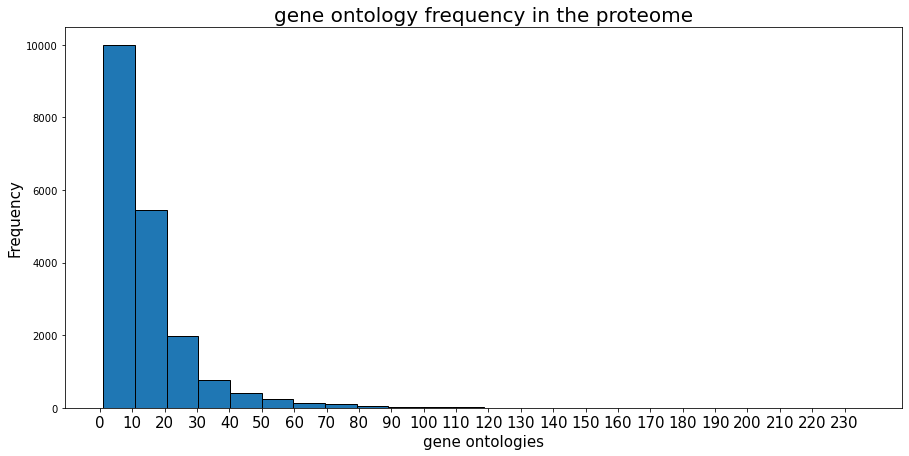

In [18]:
hist = data.hist(bins=24, column = 'count', xlabelsize = 15, figsize = (15,7), align = 'mid', ec='black', grid=False)

plt.xlabel('gene ontologies',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(np.arange(0, 240, 10))
plt.title('gene ontology frequency in the proteome',fontsize=20)
plt.savefig('proteome.png', bbox_inches='tight', pad_inches = 0.0)